# A very brief RatInABox demo for the Clopath Lab
First install `ratinabox` via `pip`

In [73]:
!pip install ratinabox

# Import `RatInABox` and its modules

In [74]:
import ratinabox
ratinabox.stylize_plots() # (optional) pretty plots
from ratinabox.Environment import Environment
from ratinabox.Agent import Agent 
from ratinabox.Neurons import * 

import numpy as np 

# Generate and visualise some place cell data

In [75]:
Env = Environment() # create an Environment 
Env.add_wall([[0.5,0],[0.5,0.5]]) #add a wall
Ag = Agent(Env) # add an Agent to the Environment
Cells = BoundaryVectorCells(Ag,params={'n':40}) # add some place cells to the Agent

In [76]:
while Ag.t < 60:
  Ag.update()
  Cells.update()

# Visualise it
* Plot the place cell rate maps, 
* Plot place cell firing rates 
* Animate trajectory

(<Figure size 600x360 with 1 Axes>,
 <Axes: xlabel='Time / min', ylabel='Neurons'>)

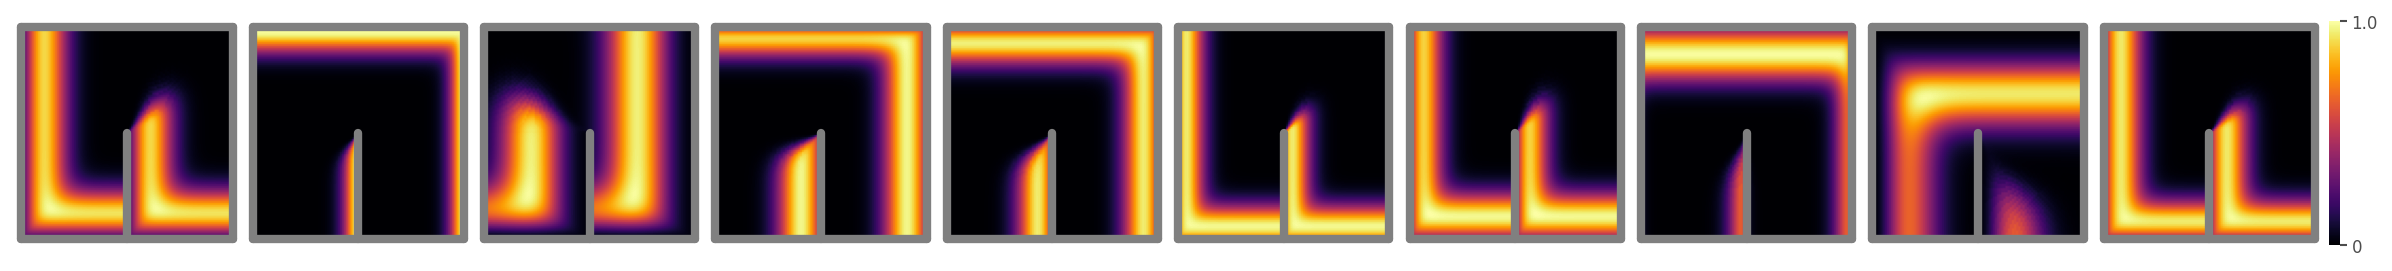

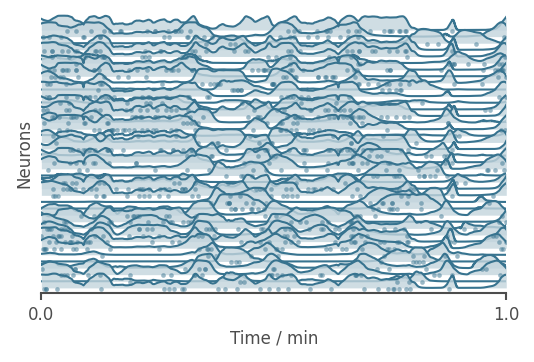

In [80]:
Cells.plot_rate_map(chosen_neurons='10') #just plot 10 of the 30
Cells.plot_rate_timeseries()

In [78]:
Ag.animate_trajectory(speed_up=6,color='changing') #6x real speed 

# Extract the data as though we're going to use it downstream

In [79]:
t = np.array(Ag.history['t'])
pos = np.array(Ag.history['pos'])
fr = np.array(PCs.history['firingrate'])
spikes = np.array(PCs.history['spikes'],int)

print(f"Time:\n{t[:10]}... \nPosition:\n{pos[:10]}... \nFiring rate:\n{fr[:10]}... \nSpikes:\n{spikes[:10]}...")

Time:
[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]... 
Position:
[[0.62530353 0.23960582]
 [0.62575421 0.23898184]
 [0.62621134 0.23832774]
 [0.6266479  0.23767525]
 [0.62710345 0.23697834]
 [0.6275439  0.23629929]
 [0.62798908 0.23561889]
 [0.62844946 0.23494988]
 [0.62885706 0.23437553]
 [0.62927999 0.23380238]]... 
Firing rate:
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.23539583e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.20592947e-03 0.00000000e+00 0.00000000e+00
  6.68171982e-01 0.00000000e+00 3.81047667e-05 6.30182020e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.80939682e-04 0.00000000e+00 0.00000000e+00 3.43211996e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 5.65072222e-02
  8.45868650e-01 5.35601233e-01 8.40675657e-03 4.58030470e-04
  2.75770125e-01 0.00000000e+00 0.00000000e+00 8.98488866e-06]
 [0.00000000e+00 0.00000000e+00 0.00000

# Now we'll go back and change it up by:
* Making the Env a circular loop
* Place cells not boundary vector cells
* Make the agent move around the loop 
* Show spikes 

In [72]:
Env = Environment(params={
    'boundary':[[np.cos(t),np.sin(t)] for t in np.linspace(0,2*np.pi,100)],
    'holes':[[[0.7*np.cos(t),0.7*np.sin(t)] for t in np.linspace(0,2*np.pi,100)]],
    }) # create an Environment 
Ag = Agent(Env) # add an Agent to the Environment
Cells = PlaceCells(Ag,params={'n':40}) # add some place cells to the Agent


while Ag.t < 60:
  drift_velocity = 0.1*np.array([-Ag.pos[1],Ag.pos[0]])
  Ag.update(drift_velocity=drift_velocity)
  PCs.update()


'geodesic' wall geometry only supported for enivoronments with 1 additional wall (4 boundaing walls + 1 additional). Sorry. Using 'line_of_sight' instead.
